# Solar Radiation Forecasting - Time Series Project

-----------------

## Dataset Kaggle - https://www.kaggle.com/dronio/SolarEnergy

 * Input : 4 month data consisting of Temperature, Pressure, Wind and Solar Radiation
 * Output : Predict the next day's Radiation on hourly basis


------------------------------------

## Summary of the notebook

  * Data Preparation
    * Sample the Dataset to the required frequency
    * Interpolate Missing Data
    * Splitting into Train and Validation Set
    * Converting to a rolling-window format
  * Train Different Models
    * ARIMA
    * Multi-Layer Perceptron Nueral Network
    * LSTM Model


--------------
--------------





In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
#Reading the dataset
df = pd.read_csv('SolarPrediction.csv')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
df = df.drop('UNIXTime',axis=1)

## Preparing the Dataset
------------

 * Resample data to 1 hour frequency
 * Index the dataframe by time period


##### Extract hour from the Time Column and sample it using the pandas group by function

In [4]:
## Extract hour from the time column
df['Hour'] = df.Time.str[:2]

#Take mean of all samples for that hour and create a single observation
df = df.groupby(['Data','Hour']).mean()

##### Re-Indexing the dataframe

In [5]:
#Reset the multiple index to single index
df = df.reset_index(level=[0,1])

#Setting the DateTime column as pandas DateTime Index for the dataframe
df['DateTime'] = pd.to_datetime(pd.to_datetime(df.Data,format='%m/%d/%Y %I:%M:%S %p') + df.Hour.astype('timedelta64[h]'))
df = df.set_index('DateTime')

#Remove redundant columns
df = df.drop('Data',axis=1)
df = df.drop('Hour',axis=1)


### Interpolate Missing Data
-----

In [6]:
df = df.resample('1H').interpolate(method='linear')
df.sort_index()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
DateTime,,,,,,
2016-09-01 00:00:00,2.288750,51.125000,30.430000,103.000000,109.837500,8.857500
2016-09-01 01:00:00,2.943333,51.500000,30.417500,103.000000,121.345833,5.246667
2016-09-01 02:00:00,2.733333,51.000000,30.404167,103.000000,136.402500,9.653333
2016-09-01 03:00:00,2.344545,50.818182,30.400000,102.636364,89.257273,5.520909
2016-09-01 04:00:00,2.607500,49.083333,30.407500,102.000000,118.165833,7.965833
...,...,...,...,...,...,...
2016-12-31 19:00:00,1.221667,46.166667,30.327500,93.666667,285.428333,5.997500
2016-12-31 20:00:00,1.216667,44.166667,30.337500,87.083333,231.082500,5.435000
2016-12-31 21:00:00,1.225833,41.833333,30.343333,83.333333,213.929167,7.404167


#### We now have one hour sampled data from 01-09-2016 to 31-12-2016 
That is, 122 days x 24 hours = 2928 data points

### Plotting the data
------------

Text(0.5, 1.0, 'Wind Speed')

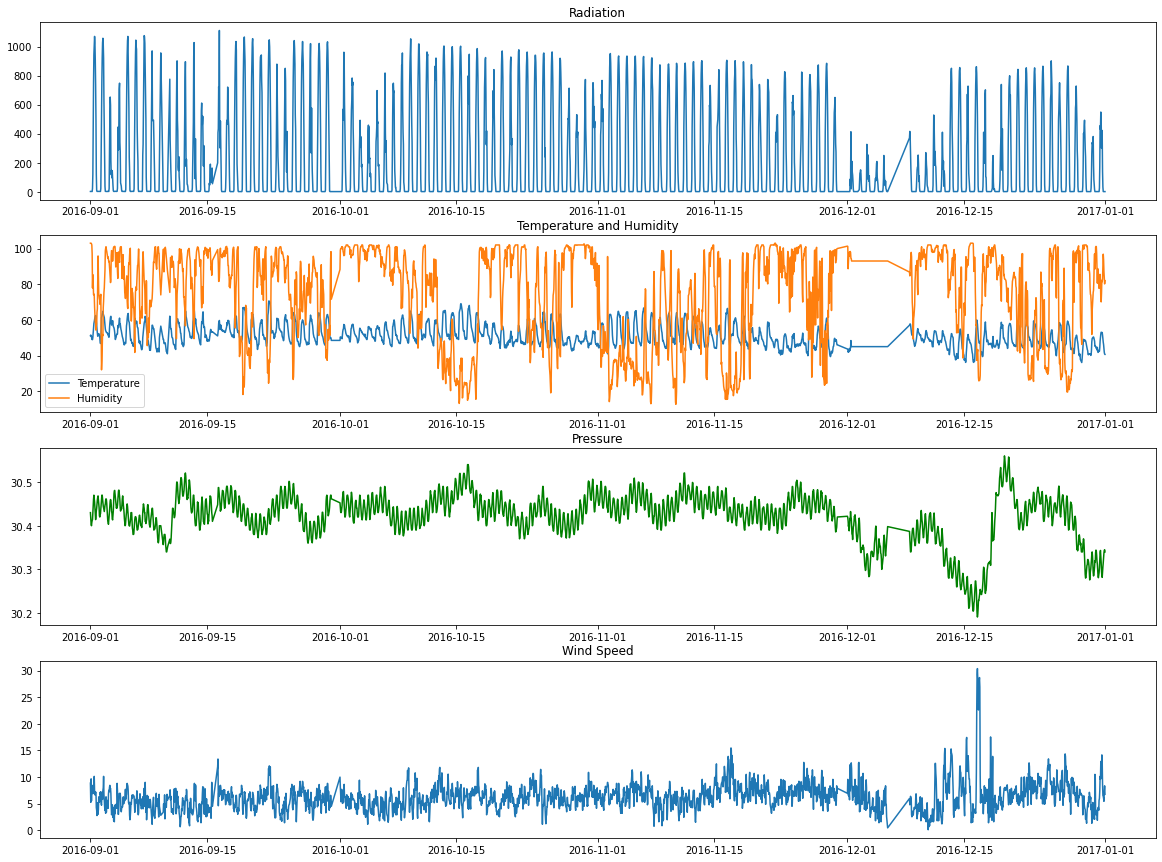

In [7]:
#Plotting Entire Series

plt.figure(figsize=(20,15))

plt.subplot(4,1,1)
plt.plot(df.Radiation,label='Radiation')
plt.title('Radiation')

plt.subplot(4,1,2)
plt.plot(df.Temperature,label='Temperature')
plt.plot(df.Humidity,label='Humidity')
plt.legend()
plt.title('Temperature and Humidity')

plt.subplot(4,1,3)
plt.plot(df.Pressure,color='green')
plt.title('Pressure')

plt.subplot(4,1,4)
plt.plot(df['Speed'])
plt.title('Wind Speed')


Text(0.5, 1.0, 'Wind Speed')

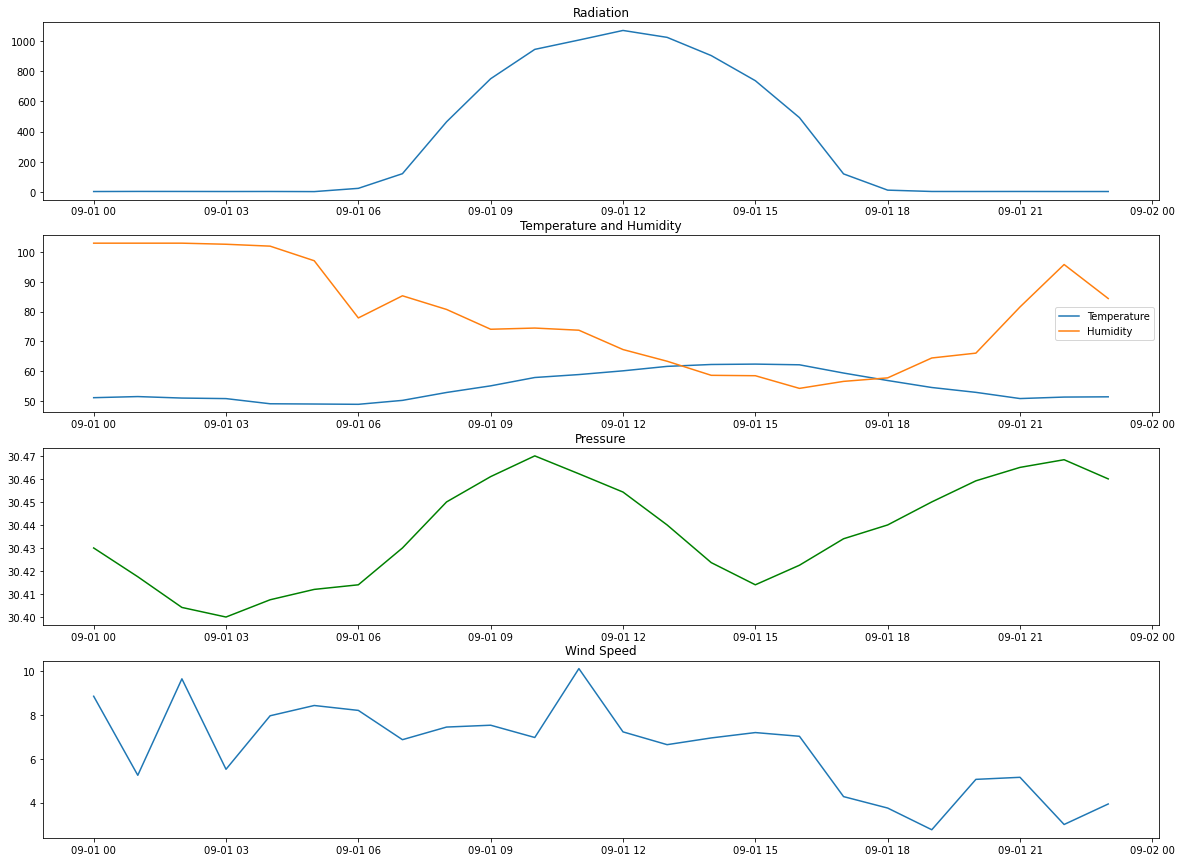

In [8]:
#Plotting a Single day's data
day = df['2016-09-01']

plt.figure(figsize=(20,15))

plt.subplot(4,1,1)
plt.plot(day.Radiation,label='Radiation')
plt.title('Radiation')

plt.subplot(4,1,2)
plt.plot(day.Temperature,label='Temperature')
plt.plot(day.Humidity,label='Humidity')
plt.legend()
plt.title('Temperature and Humidity')

plt.subplot(4,1,3)
plt.plot(day.Pressure,color='green')
plt.title('Pressure')

plt.subplot(4,1,4)
plt.plot(day['Speed'])
plt.title('Wind Speed')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

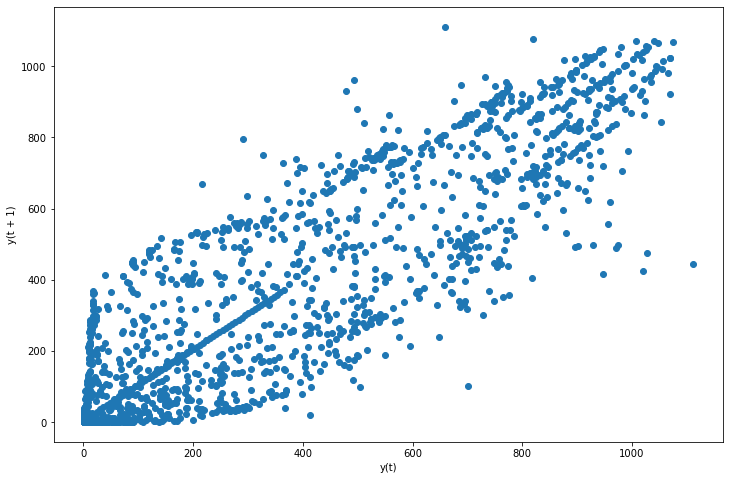

In [9]:
pd.plotting.lag_plot(df.Radiation)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

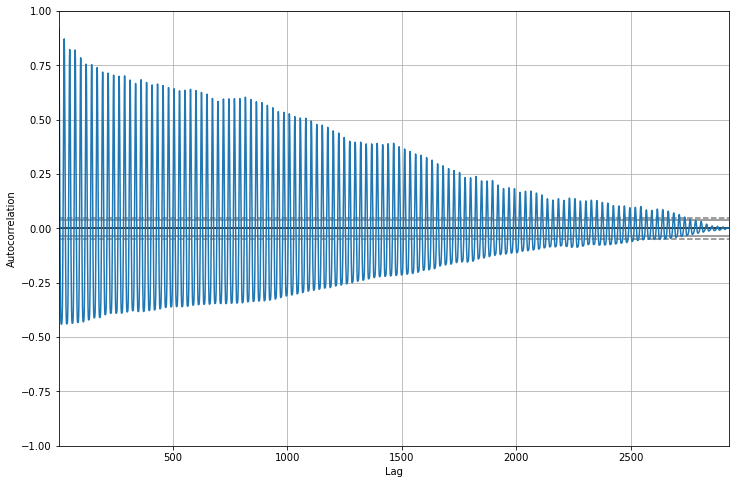

In [10]:
#from pandas.plotting import auto_correlation_plot
pd.plotting.autocorrelation_plot(df.Radiation)

The above two plot suggests that the radiation is highly correlated with it's previous time lags, therefore a rolling-window time series model may be able to accurately predict the future radiation values

### Preparing the dataset for Forecasting 
----------------

#### Splitting it to training and test data

Total Data : 122 Days
Train Data : 87 days
Test Data : 35 Days

In [11]:
split = 87 * 24

train_df = df[:split]
test_df = df[split:]

print(train_df.shape)
print(test_df.shape)

(2088, 6)
(840, 6)


### Converting the dataset to a sliding window format

In [12]:
def mmo_window(s,ws,wo):
    #ws : window size
    #wo : output step size

    X = list()
    y = list()

    for i in range(len(s)):
        #Window from i to i+ws
        end_ix = i + ws
        if end_ix > len(s) - 1:
            break
        
        end_ix_o = end_ix + wo
        if end_ix_o > len(s):
            break

        seq_x = s[i:end_ix].fillna(0)
        seq_y = s.iloc[end_ix:end_ix_o,-6].fillna(0)

        X.append(seq_x)
        y.append(seq_y)

    X = np.array(X)
    y = np.array(y)
    return X,y

In [13]:
X_train,y_train = mmo_window(train_df,24,24)
X_test,y_test = mmo_window(test_df,24,24)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2041, 24, 6)
(2041, 24)
(793, 24, 6)
(793, 24)


## Evaluation Metrics
------------------------------------

- We will be predicting the data for next 24 hours, i.e. our model will output 24 steps in future
- Evaluation Metric RMSE
  - For each step in future
  - Aggregate RMSE for entire predictions





In [15]:
#For window size = w and forecast step size s
# Actual is a (n,w,)
from sklearn import metrics
import sklearn

def evaluate_forecasts(actual, predicted):
	
    #RMSE for each step of forecast
    scores = list()

    for i in range(actual.shape[1]):
        #rmse for the ith day
        rmse = np.sqrt(sklearn.metrics.mean_squared_error(actual[:,i],predicted[:,i]))
        scores.append(rmse)
    
    #Overall RMSE
    rss = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            rss += (actual[row, col] - predicted[row, col])**2
            

    rmse = np.sqrt(rss / (actual.shape[0] * actual.shape[1]))
    

    print("----------------------------------------------------")
    print("Overall RMSE : ",rmse)
    print("RMSE per ith step ",scores)

    return rmse,scores



## ARIMA MODEL
-------------

In [16]:
from statsmodels.tsa.arima.model import ARIMA

#ARIMA Model predicting 24 datapoints in future
def arima():

    predictions = list()

    #Fit Train data to ARIMA
    model = ARIMA(train_df.Radiation,order=(24,1,0))
    model = model.fit()

    i = 0
    l = len(train_df.Radiation)
    #For loop to predict the next 24 points for each instances of the test data point
    for t in range(len(X_test)):
    
        output = model.predict(l + i,l + 24 + i - 1)
        predictions.append([output])
        i = i + 1

    #Return the predictions
    return np.array(predictions).reshape(-1,24)

In [17]:
arima_ypred = arima()

In [18]:
arima_rmse,arima_scores = evaluate_forecasts(arima_ypred,y_test)

----------------------------------------------------
Overall RMSE :  221.03786467835678
RMSE per ith step  [220.1481322157163, 220.221105790513, 220.29382832263798, 220.3700210951505, 220.4528820784898, 220.54558622602974, 220.65597529392943, 220.75552497921024, 220.74207893129935, 220.84424392560692, 220.88238801063227, 221.03669344826432, 221.1289245096571, 221.09412008112497, 221.1135349704825, 221.13433150118382, 221.1889737095168, 221.3490106551289, 221.50300572017474, 221.65473485689387, 221.78820393716168, 221.9016832107343, 221.9999673451128, 222.08684557530506]


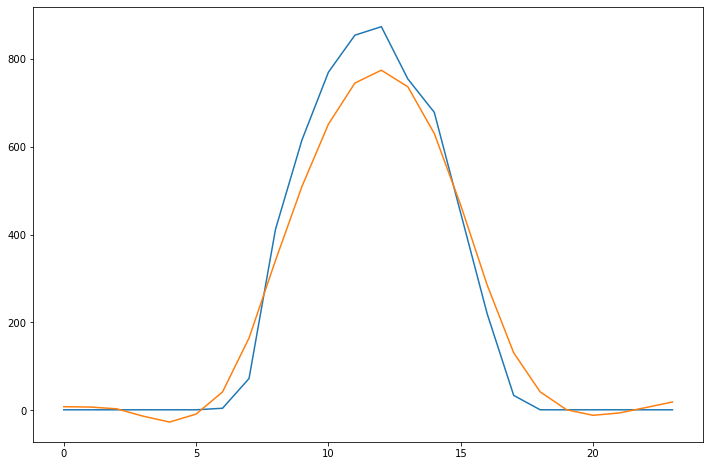

In [19]:
plt.plot(test_df['2016-11-27'].Radiation.values)
plt.plot(arima_ypred[0])

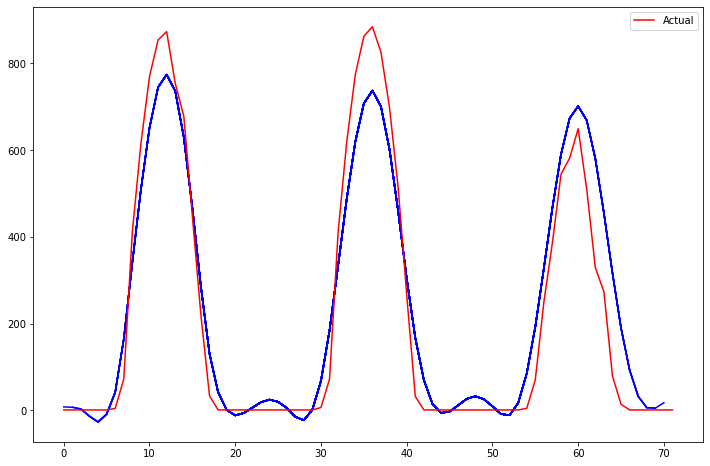

In [20]:
i = 0
for x in arima_ypred[:48]:
    plt.plot(range(i,24+i),x,color='blue')
    i = i + 1
plt.plot(test_df[:72].Radiation.values,label='Actual',color='red')
plt.legend()

## MLP MODEL
---------

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import optimizers

In [22]:
def mlp(trainX,trainy,testX,testy):
    
    inp_shape = trainX.shape[1]*trainX.shape[2]

    trainX = trainX.reshape(trainX.shape[0],inp_shape)  
    testX = testX.reshape(testX.shape[0],inp_shape)

    #Defining MLP Model
    model = Sequential()
    model.add(Dense(100,activation='relu',input_dim=inp_shape))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(trainy.shape[1]))
    model.compile(optimizer='adam',loss='mse')

    #Fitting it with train data
    model.fit(trainX.reshape(trainX.shape[0],inp_shape),trainy,epochs=100,validation_data=(testX,testy),verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=2)])

    #Predicting and evaluating it on test accuracy
    ypred = model.predict(testX)

    rmse,scores = evaluate_forecasts(ypred,testy)

    
    plt.plot(ypred[0],label='Predicted',marker='o')
    plt.plot(test_df['2016-11-27'].Radiation.values,label='Actual')
    plt.title("1 Day prediction vs Actual Irradiance Value for the most recent day")
    plt.legend()


    return (ypred,rmse,scores)

Epoch 1/100
64/64 [==============================] - 3s 27ms/step - loss: 105370.1680 - val_loss: 22122.2188
Epoch 2/100
64/64 [==============================] - 1s 9ms/step - loss: 21958.0357 - val_loss: 21580.6816
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 18612.8492 - val_loss: 20837.2227
Epoch 4/100
64/64 [==============================] - 1s 8ms/step - loss: 17917.6619 - val_loss: 21739.1660
Epoch 5/100
64/64 [==============================] - 1s 9ms/step - loss: 18040.1376 - val_loss: 21156.4883
----------------------------------------------------
Overall RMSE :  145.4526937364206
RMSE per ith step  [88.02576846529293, 111.1451217746032, 137.89248526107215, 141.88472593201493, 149.10586407044883, 140.36553245819292, 152.30031616140076, 142.1494533419401, 162.03155806332146, 181.26548480168066, 167.1118077712218, 151.80920383273644, 154.38893151027918, 156.91439982556648, 149.15585555809002, 130.1324567200807, 148.33097907827334, 138.65797496871863, 

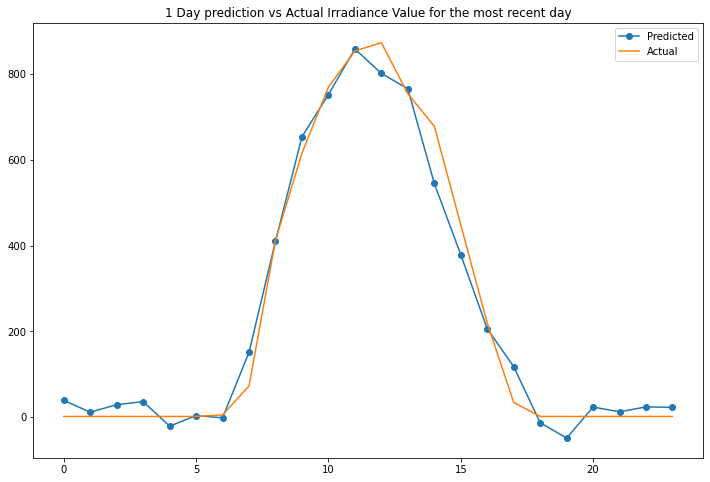

In [23]:
mlp_pred,mlp_rmse,mlp_scores = mlp(X_train,y_train,X_test,y_test)

In [36]:
def lstm(trainX,trainy,testX,testy):
    
    inp_shape = trainX.shape[1]*trainX.shape[2]

    #trainX = trainX.reshape(trainX.shape[0],inp_shape)  
    #testX = testX.reshape(testX.shape[0],inp_shape)

    model = Sequential()
    model.add(LSTM(200,activation='relu',return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2])))
    model.add(LSTM(200,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(trainy.shape[1]))
    model.compile(loss='mse',optimizer='adam')

    #Fitting it with train data
    model.fit(trainX,trainy,epochs=100,validation_data=(testX,testy),verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

    #Predicting and evaluating it on test accuracy
    ypred = model.predict(testX)

    rmse,scores = evaluate_forecasts(ypred,testy)

    

    plt.plot(ypred[-1],label='Predicted',marker='o')
    plt.plot(test_df['2016-11-27'].Radiation.values,label='Actual')
    plt.title("1 Day prediction vs Actual Irradiance Value for the most recent day")
    plt.legend()


    return (ypred,rmse,scores)

Epoch 1/100
64/64 [==============================] - 49s 393ms/step - loss: 164473.8260 - val_loss: 93856.0703
Epoch 2/100
64/64 [==============================] - 23s 362ms/step - loss: 159260.7031 - val_loss: 57189.8203
Epoch 3/100
64/64 [==============================] - 24s 373ms/step - loss: 127688.3992 - val_loss: 63156.8633
Epoch 4/100
64/64 [==============================] - 24s 381ms/step - loss: 90247.0900 - val_loss: 47764.6250
Epoch 5/100
64/64 [==============================] - 24s 374ms/step - loss: 87315.3278 - val_loss: 77425.8984
Epoch 6/100
64/64 [==============================] - 24s 375ms/step - loss: 127036.9406 - val_loss: 49273.1562
Epoch 7/100
64/64 [==============================] - 24s 381ms/step - loss: 98222.9608 - val_loss: 43985.9805
Epoch 8/100
64/64 [==============================] - 23s 357ms/step - loss: 82502.0096 - val_loss: 40455.9258
Epoch 9/100
64/64 [==============================] - 24s 371ms/step - loss: 95312.9566 - val_loss: 42683.8398
Epoch 

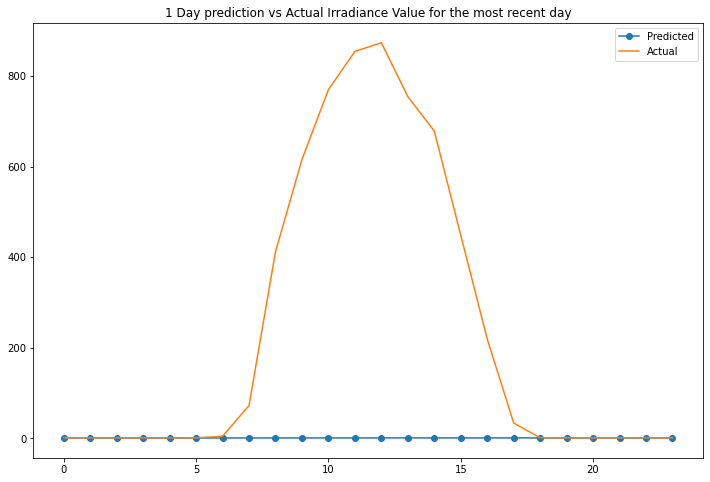

In [37]:
lstm_pred,lstm_rmse,lstm_scores = lstm(X_train,y_train,X_test,y_test)

Text(0.5, 1.0, 'Step wise RMSE for each of the 1st to 24th step in future')

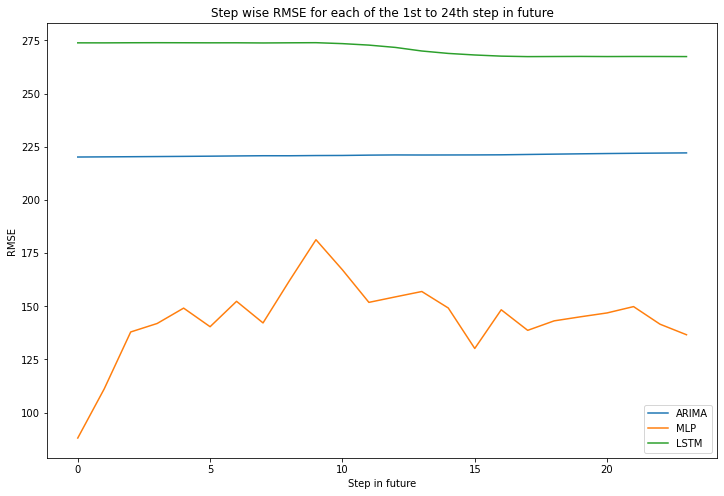

In [38]:
plt.plot(arima_scores,label='ARIMA')
plt.plot(mlp_scores,label='MLP')
plt.plot(lstm_scores,label='LSTM')
plt.legend()
plt.xlabel('Step in future')
plt.ylabel('RMSE')
plt.title('Step wise RMSE for each of the 1st to 24th step in future')

### We can see from the above graph, that that all models have low RMSE when predicting near future 

### MLP and LSTM perform significantly better, especially for multi step forecasts with LSTM slightly better than MLP

In [31]:
print("ARIMA Overall RMSE \t",arima_rmse)
print("MLP Overall RMSE \t",mlp_rmse)
print("LSTM Overall RMSE \t",lstm_rmse)

ARIMA Overall RMSE 	 221.03786467835678
MLP Overall RMSE 	 145.4526937364206
LSTM Overall RMSE 	 154.99375576187012
